In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
from scipy import stats as ss

In [2]:
df = pd.read_csv('autos_after_cleaning.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3t�rer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31,0,60437,2016-04-06 10:17:21


#### 1. Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization.

In [4]:
vehicle_count = df['brand'].value_counts()

In [5]:
vehicle_count

Volkswagen       79639
Bmw              40274
Opel             40136
Mercedes_benz    35307
Audi             32873
Ford             25573
Renault          17969
Peugeot          11027
Fiat              9676
Seat              7022
Mazda             5695
Skoda             5641
Smart             5249
Citroen           5182
Nissan            5037
Toyota            4694
Hyundai           3646
Mini              3394
Volvo             3327
Mitsubishi        3061
Honda             2836
Kia               2555
Alfa_romeo        2345
Suzuki            2327
Porsche           2215
Chevrolet         1845
Chrysler          1452
Dacia              900
Jeep               807
Daihatsu           806
Subaru             779
Land_rover         770
Jaguar             621
Trabant            591
Daewoo             542
Saab               530
Rover              490
Lancia             484
Lada               225
Name: brand, dtype: int64

In [6]:
vehicle_count_df = pd.DataFrame(vehicle_count)

In [7]:
vehicle_count_df = vehicle_count_df.reset_index()

In [8]:
vehicle_count_df

,index,brand
0,Volkswagen,79639
1,Bmw,40274
2,Opel,40136
3,Mercedes_benz,35307
4,Audi,32873
5,Ford,25573
6,Renault,17969
7,Peugeot,11027
8,Fiat,9676
9,Seat,7022


In [9]:
vehicle_count_df.rename(columns = {"index":"Brand","brand":"val_counts"},inplace = True)

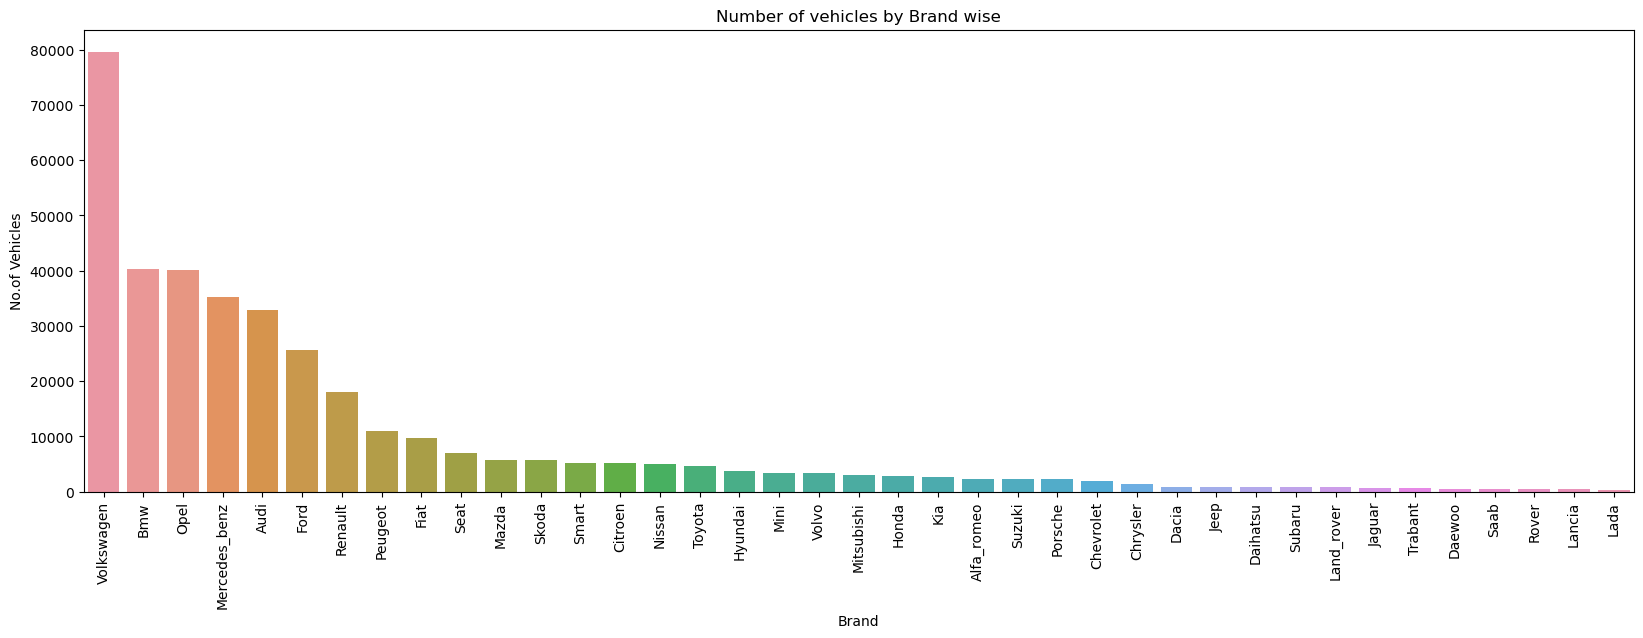

In [10]:
plt.figure(figsize = (20, 6))
sns.barplot(data = vehicle_count_df ,x = "Brand",y = "val_counts")
plt.title('Number of vehicles by Brand wise')
plt.xlabel('Brand')
plt.ylabel('No.of Vehicles')
plt.xticks(rotation = 90)
plt.show()


### 2. What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis.

In [11]:
vehicle_gp = df.groupby("vehicleType")[["price"]].mean()
vehicle_gp=vehicle_gp.reset_index()

In [12]:
vehicle_gp

,vehicleType,price
0,Andere,40483.537217
1,Bus,10302.154602
2,Cabrio,14818.152195
3,Coupe,24073.071794
4,Kleinwagen,4188.791819
5,Kombi,7882.399545
6,Limousine,14210.157136
7,Suv,12995.190972


In [13]:
gear_gp = df.groupby("gearbox")[["price"]].mean()
gear_gp=gear_gp.reset_index( )

In [14]:
gear_gp

,gearbox,price
0,Automatik,16027.504194
1,Manuell,9403.267766


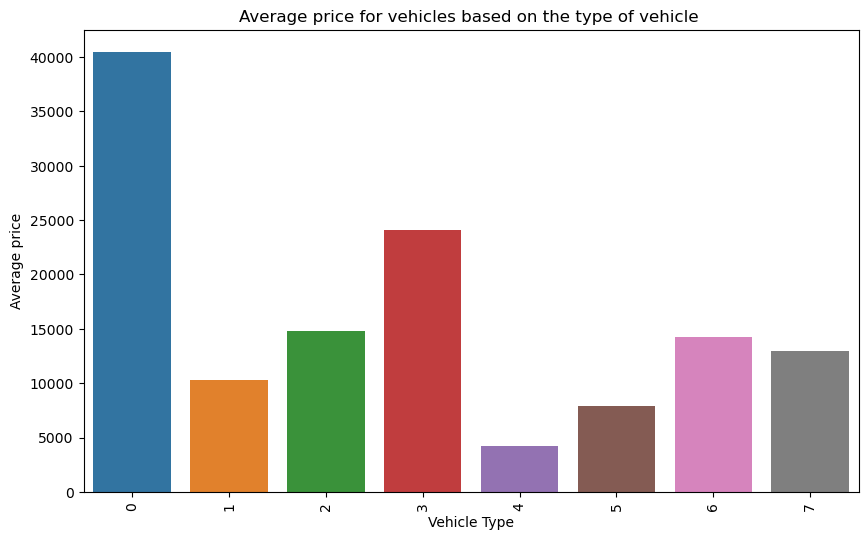

In [15]:
plt.figure(figsize = (10, 6))
sns.barplot(data = vehicle_gp,x = vehicle_gp.index,y = "price")
plt.title('Average price for vehicles based on the type of vehicle ')
plt.xlabel('Vehicle Type')
plt.ylabel('Average price')
plt.xticks(rotation = 90)
plt.show()

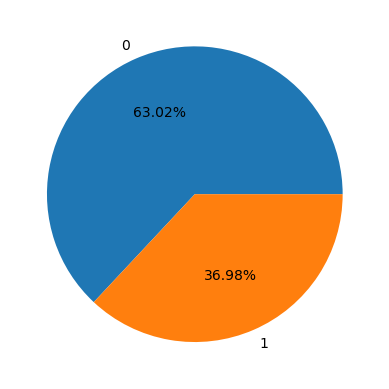

In [16]:
plt.pie(gear_gp.price, labels = gear_gp.index ,autopct = '%1.2f%%')
plt.show()

### 3. What is the marginal probability of private seller.

In [17]:
# marginal probability=count of private sellers / Total count of sellers
count_privat = df.seller.value_counts().get("Privat",0)              # count of privat sellers 
count_Gewerblich = df.seller.value_counts().get("Gewerblich",0)      # count of Gewerblich sellers
count_seller = count_privat + count_Gewerblich                       # Total count of sellers

In [18]:
marginal_prob=count_privat/count_seller
marginal_prob

0.9999918376675319